IMPORTING DATA FROM QUANDL USING QUANDL API

In [2]:
import pandas as pd
import math
import quandl
data = quandl.get("WIKI/GOOGL")
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
data= data[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
data.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
data['HL_PCT'] = (data['Adj. High']-data['Adj. Close'])/data['Adj. Close']*100.00
data['PCT_change'] = (data['Adj. Close']-data['Adj. Open'])/data['Adj. Open']*100.00
data.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [5]:
data = data[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forcast_col = 'Adj. Close'
data.fillna(-99999, inplace = True)
forcast_out = int(math.ceil(0.1*len(data)))
print(len(data))
print(forcast_out)
data['label'] = data[forcast_col].shift(-forcast_out)
data.dropna(inplace=True)
data.head()
data.tail()

3424
343


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-11-04,781.10,0.944821,1.270582,1970603.0,1094.00
2016-11-07,802.03,0.370310,0.890622,1992570.0,1053.15
2016-11-08,811.98,0.500012,1.240602,1769069.0,1026.55
2016-11-09,805.59,0.759692,0.468927,3098510.0,1054.09
2016-11-10,780.29,3.815248,-3.667901,5909609.0,1006.94


# Model building and Prediction using Linear Regression

In [7]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X = np.array(data.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out:]
X = X[:-forcast_out]
y = np.array(data['label'][:-forcast_out])
#y = np.array(data['label'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)
Accuracy  = clf.score(X_test, y_test)
Forcast_set = clf.predict(X_lately)
#print(Forcast_set, Accuracy, forcast_out)

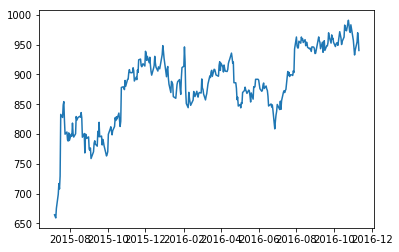

In [18]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

x_axis = data.index
x_axis = x_axis[-forcast_out:]
#print(x_axis)
y_axis = Forcast_set
#print(y_axis)
plt.plot(x_axis, y_axis)
plt.xlable = "Date"
plt.xlable = "Forcasted Value"
plt.show()